In [1]:
# Look at All Behavior Positions

import csv
import matplotlib.pyplot as plt
import numpy as np

# csv_fname = "WiggleBehaviorFrames.csv"
# file = open(csv_fname)
# csvreader = csv.reader(file)

# Set Day of Choice Here!!!
# i = 3

date_labels = []
all_sessions_start = []
all_sessions_stop = []
for i in range(8):
    
    csv_fname = "WiggleBehaviorFrames.csv"
    file = open(csv_fname)
    csvreader = csv.reader(file)

    year = "WiggleLocations/2023-"
    dates = ["01-16", "01-19", "01-21", "01-23", "01-25", "01-27", "01-30", "02-03"]
    suffix = "FULL_LocationOutput.csv"
    start = []
    stop = []
    day_of_choice = "2023-" + dates[i]

    for row in csvreader:
        date = row[0]
        f_start = row[1]
        f_stop = row[2]

        if date == day_of_choice:
            date_labels.append(dates[i])
            start.append(int(f_start))
            all_sessions_start.append(int(f_start))
            stop.append(int(f_stop))
            all_sessions_stop.append(int(f_stop))

    num_clips = len(start)
    print("Day of Choice = ", day_of_choice, "Number of Clips = ", num_clips)
    # print("Start Frame(s) = ", start, "\nStop Frame(s) = ",stop)

Day of Choice =  2023-01-16 Number of Clips =  1
Day of Choice =  2023-01-19 Number of Clips =  3
Day of Choice =  2023-01-21 Number of Clips =  2
Day of Choice =  2023-01-23 Number of Clips =  2
Day of Choice =  2023-01-25 Number of Clips =  3
Day of Choice =  2023-01-27 Number of Clips =  1
Day of Choice =  2023-01-30 Number of Clips =  2
Day of Choice =  2023-02-03 Number of Clips =  1


Num Frames: 26257 26257


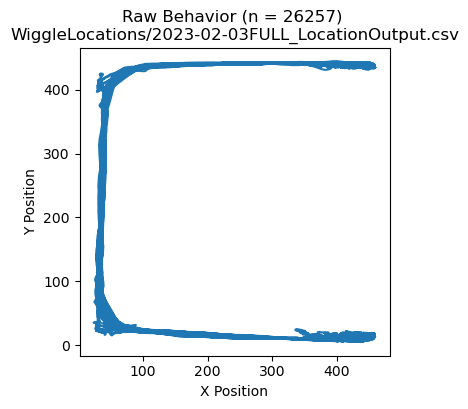

In [2]:
# csv_fname = "ezTrack/2023-02-03_LocationOutput.csv"
csv_fname = year + dates[i] + suffix


def load_behavior_file(csv_fname, start, stop):
    # Load Raw Behavior Data
    file = open(csv_fname)
    csvreader = csv.reader(file)
    pos_x = []
    pos_y = []
    for row in csvreader:
        if row[7] != 'X': # skip the first row
            pos_x.append(float(row[7])) 
            pos_y.append(float(row[8]))

    # Removing Out of Sync Behavior Frames
    pos_x = pos_x[start:stop]
    pos_y = pos_y[start:stop]

    print("Num Frames:", len(pos_x), len(pos_y))

    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    plt.plot(pos_x, pos_y)
    plt.title("Raw Behavior (n = "+ str(len(pos_x))+ ") \n" + csv_fname)
    # plt.title("Raw Behavior \n " + csv_fname)
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.savefig("raw-behavior.png")
    plt.show()
    
    return pos_x, pos_y

for i in range(num_clips):
    pos_x, pos_y = load_behavior_file(csv_fname, start[i], stop[i])

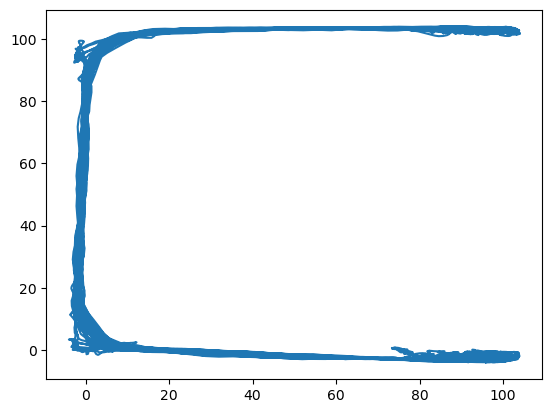

In [3]:
# Scale X and Y Positions to 100

def scale_pos(pos_x, pos_y):
    pos_x = np.array(pos_x)
    OldRange = (max(pos_x) - min(pos_x))  
    NewRange = (108 - 0)  
    scaled_pos_x = (((pos_x - min(pos_x)) * NewRange) / OldRange) - 4

    pos_y = np.array(pos_y)
    OldRange = (max(pos_y) - min(pos_y))  
    NewRange = (108 - 0)  
    scaled_pos_y = (((pos_y - min(pos_y)) * NewRange) / OldRange) - 4

    return scaled_pos_x, scaled_pos_y

scaled_pos_x, scaled_pos_y = scale_pos(pos_x, pos_y)
# plt.plot(pos_x, pos_y)
plt.plot(scaled_pos_x, scaled_pos_y)

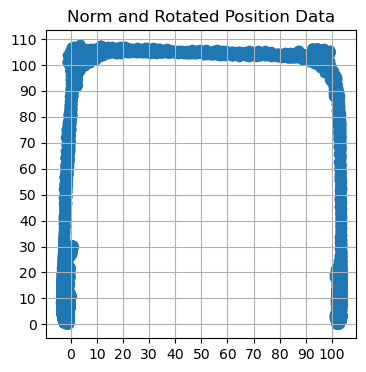

In [4]:
def norm_rotate_behavior(pos_x, pos_y):
    # Normalize and transform raw position data in order to linearize
    pos_x_norm = pos_x # (pos_x-np.min(pos_x))/(np.max(pos_x)-np.min(pos_x))
    pos_y_norm = pos_y # (pos_y-np.min(pos_y))/(np.max(pos_y)-np.min(pos_y))
    
    # Rotate position data
    x = pos_y_norm
    y = max(pos_x_norm) - pos_x_norm
    
    # Plotting new position data
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    ax.set_xticks(np.arange(0, 120, 10))
    ax.set_yticks(np.arange(0, 120, 10))
    plt.scatter(x, y)
    plt.grid()
    plt.title("Norm and Rotated Position Data")
    plt.show()
    
    return x, y

pos_x, pos_y = norm_rotate_behavior(scaled_pos_x, scaled_pos_y)

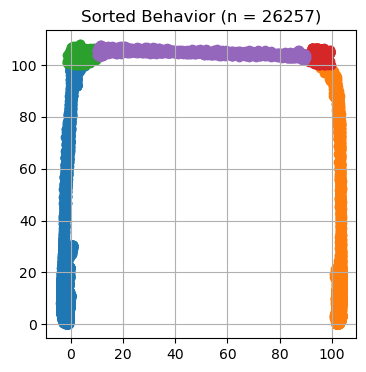

In [5]:
def transform_arm1(x,y):
    return y

def transform_arm2(x,y):
    return (100 - y) + 200

def transform_center(x,y):
    return x + 100

def linearize_behavior(x, y):
    # Linearize rotated/normalized behavior tracking data
    # Turn left and right arms outward before the corner begins
    # Corner is considered upper right and upper left 10th box

    arm1 = []
    arm2 = []
    corner1 = []
    corner2 = []
    center = []
    linearized_data = []
    category = []

    for i in range(len(x)):
        # Arm 1 Condition
        if x[i] < 10 and y[i] <= (100):
            cat = "arm1"
            arm1.append((x[i], y[i]))
            linearized_data.append((transform_arm1(x[i], y[i]),cat))
            category.append(1)

        # Corner 1 Condition
        elif x[i] < 10 and y[i] > (100):
            cat = "corner1"
            corner1.append((x[i], y[i]))
            linearized_data.append((transform_arm1(x[i], y[i]),cat))
            category.append(2)

        # Arm 2 Condition
        elif x[i] > (90) and y[i] <= (100):
            cat = "arm2"
            arm2.append((x[i], y[i]))
            linearized_data.append((transform_arm2(x[i], y[i]),cat))
            category.append(3)

        # Corner 2 Condition
        elif x[i] > (90) and y[i] > (100):
            cat = "corner2"
            corner2.append((x[i], y[i]))
            linearized_data.append((transform_arm2(x[i], y[i]),cat))
            category.append(4)

        else:
            # Center Condition
            cat = "center"
            center.append((x[i], y[i]))
            linearized_data.append((transform_center(x[i], y[i]),cat))
            category.append(5)

    # Sanity Check
    if(len(arm1) + len(corner1) + len(arm2) + len(corner2) + len(center) != len(x)):
        print("Error lengths not equal")
    if(len(linearized_data) != len(x)):
        print("Error in Length of Linearized Data")

    # Plot Sorted Behavior Position
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    plt.scatter([i for i,j in arm1],[j for i,j in arm1])
    plt.scatter([i for i,j in arm2],[j for i,j in arm2])
    plt.scatter([i for i,j in corner1],[j for i,j in corner1])
    plt.scatter([i for i,j in corner2],[j for i,j in corner2])
    plt.scatter([i for i,j in center],[j for i,j in center])
    plt.grid()
    plt.title("Sorted Behavior (n = "+ str(len(linearized_data))+ ")")
    plt.show()
    
    category = np.array(category)
    
    return linearized_data, category
    
linearized_data, category = linearize_behavior(pos_x, pos_y)

arm1 min =  0.05050499402157982  max =  99.99992527957572
arm2 min =  200.00921793592659  max =  300.0
corner1 min =  100.00025798864574  max =  108.0
corner2 min =  193.26892645515417  max =  199.98383795258593
center min =  110.00961546695157  max =  189.9738402215999


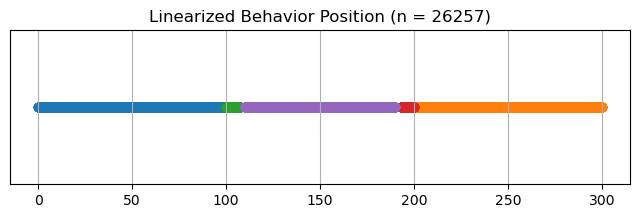

In [6]:
def plot_linearized_data_category(data, category, color=None):
    # Plot category of linearized data
    # Inputs include data, category, and color (optional)
    # Choose from arm1, arm2, corner1, corner2, center
    plot_data = [i for i,j in data if j == category]
    print(category, "min = ", min(plot_data), " max = ", max(plot_data))
    plt.scatter(plot_data, [1 for i,j in data if j == category], c=color)

def plot_linearized_behavior(data):
    fig = plt.figure(figsize=(8, 2))
    ax = fig.gca()
    plot_linearized_data_category(data, 'arm1')  
    plot_linearized_data_category(data, 'arm2')
    plot_linearized_data_category(data, 'corner1')
    plot_linearized_data_category(data, 'corner2')
    plot_linearized_data_category(data, 'center')
    plt.ylim(0.9,1.1)
    ax.set_yticks([])
    plt.grid()
    plt.title("Linearized Behavior Position (n = "+ str(len(data))+ ")")
    plt.show()
    
plot_linearized_behavior(linearized_data)

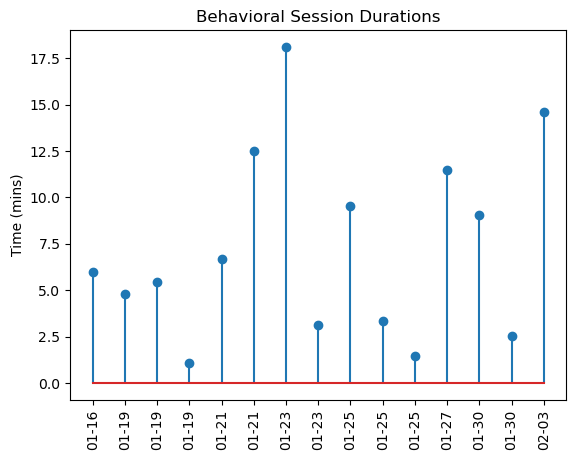

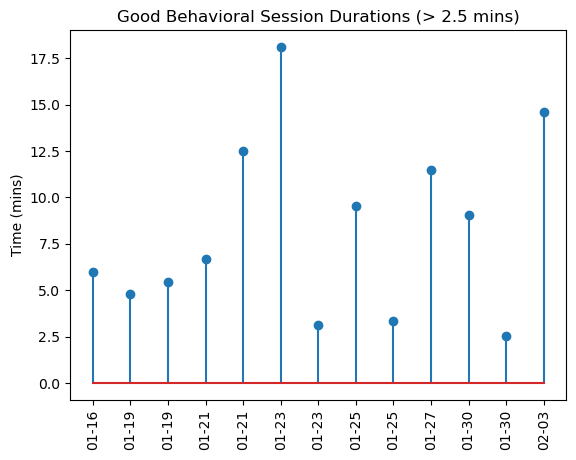

In [7]:
# print(np.array(all_sessions_stop) - np.array(all_sessions_start))
clip_durations = ((np.array(all_sessions_stop) - np.array(all_sessions_start))/30)/60
date_labels = np.array(date_labels)
all_sessions_start = np.array(all_sessions_start)
all_sessions_stop = np.array(all_sessions_stop)

plt.stem(clip_durations)
plt.title("Behavioral Session Durations")
plt.xticks(range(len(date_labels)), date_labels, rotation=90)
plt.ylabel("Time (mins)")
# plt.savefig("behavior-durations.png")
plt.show()

# If time duration < 2.5 minutes, remove session
good_clips = clip_durations[clip_durations > 2.5]
good_clips_labels = date_labels[clip_durations > 2.5]

good_clips_start = all_sessions_start[clip_durations > 2.5]
good_clips_stop = all_sessions_stop[clip_durations > 2.5]

plt.stem(good_clips)
plt.title("Good Behavioral Session Durations (> 2.5 mins)")
plt.xticks(range(len(good_clips_labels)), good_clips_labels,rotation=90)
plt.ylabel("Time (mins)")
# plt.savefig("behavior-durations.png")
plt.show()

In [ ]:
# all_positions = np.load("all_positions.npy",  allow_pickle=True)


# scaled_pos_x, scaled_pos_y = scale_pos(pos_x, pos_y)
# pos_x, pos_y = norm_rotate_behavior(scaled_pos_x, scaled_pos_y)
# linearized_data, category = linearize_behavior(pos_x, pos_y)


In [ ]:
# from scipy.signal import find_peaks
# # TODO: split up trials

# # Buckets
# # a) Moving Forward
# # b) Moving Backwards
# # arm1, corner 1, arm2, corner 2

# plot_data = np.array([i for i,j in linearized_data])
    
# peaks, _ = find_peaks(plot_data, height=100, width=50, prominence=100)

# plt.plot(plot_data)
# plt.plot(peaks, plot_data[peaks], "x")
# plt.show()

    
# # peaks, _ = find_peaks(-1*plot_data, height=100, width=50, prominence=100)

# plt.plot(np.diff(plot_data))
# # plt.plot(peaks, -1*plot_data[peaks], "x")
# plt.show()